Utiliser donc des méthodes non supervisées pour regrouper des clients de profils 
similaires. Ces catégories pourront être utilisées par l’équipe Marketing pour mieux communiquer. 

Développer une application Web interactive avec Dash qui résumera les résultats de vos 
analyses et de votre segmentation.

Dans l’application, montrez d’où viennent le plus de chiffre d’affaire et d’autres analyses 
similaires.

Quels clients payent le plus de frais de livraison ?

Les catégories de produits les plus vendues ?

Que peut-on dire des moyens de paiement utilisés par les clients ?….
***************************************************************************

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from turtle import color
import plotly_express as px
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

In [2]:
order_payments_data = pd.read_csv('C:/Users/SYLVAIN/Downloads/Data Olist/Data/olist_order_payments_dataset.csv', sep=';', encoding='utf-8-sig')
order_payments_data.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [3]:
order_items_data = pd.read_csv('C:/Users/SYLVAIN/Downloads/Data Olist/Data/olist_order_items_dataset.csv', sep=';', encoding='utf-8-sig')
order_items_data.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,19/09/2017 09:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,03/05/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,18/01/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,15/08/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,13/02/2017 13:57,199.90,18.14


In [4]:
order_items_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [59]:
order_items_data.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [60]:
order_items_data.duplicated().sum()

0

In [61]:
# Supprimer la colonne
order_items_dataframe = order_items_data.drop(['shipping_limit_date'], axis=1)

In [62]:
order_items_dataframe.groupby('price')['freight_value'].mean()

price
0.85        19.586667
1.20         7.890000
2.20         7.390000
2.29         7.780000
2.90         8.720000
              ...    
4690.00     74.340000
4799.00    151.340000
6499.00    227.660000
6729.00    193.210000
6735.00    194.310000
Name: freight_value, Length: 5968, dtype: float64

In [9]:
# Renommer les colonnes
order_items_dataframe.rename(columns={'order_id': 'Id Commande', 'order_item_id': 'Id Article Commande', 'product_id':'Id Produit','seller_id': 'Id Vendeur','price': 'Prix', 'freight_value':'valeur du fret' }, inplace=True)
order_items_dataframe.head()

,Id Commande,Id Article Commande,Id Produit,Id Vendeur,Prix,valeur du fret
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [10]:
# Regrouper deux tables
data_merge = pd.merge(order_items_data, order_payments_data, how='inner')

In [11]:
# Suppression de la colonne
data_merge_sup = data_merge.drop(['shipping_limit_date'], axis=1)
data_merge_sup.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,1,credit_card,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,1,credit_card,3,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,1,credit_card,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,1,credit_card,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,1,credit_card,3,218.04


In [12]:
# Renommer les colonnes 
data_merge_sup.rename(columns={'order_id': 'Id Commande', 'order_item_id': 'Id Article Commande', 'product_id':'Id Produit','seller_id': 'Id Vendeur','price': 'Prix', 'freight_value':'valeur du fret', 'payment_sequential': 'paiement séquentiel', 'payment_type':'type paiement', 'payment_installments':'versements échelonnés', 'payment_value':'valeur du paiement'}, inplace=True)
data_merge_sup.head()

,Id Commande,Id Article Commande,Id Produit,Id Vendeur,Prix,valeur du fret,paiement séquentiel,type paiement,versements échelonnés,valeur du paiement
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,1,credit_card,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,1,credit_card,3,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,1,credit_card,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,1,credit_card,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,1,credit_card,3,218.04


In [13]:
# Verifier la correlation entre deux colonnes
correlation = data_merge_sup['Prix'].corr(data_merge_sup['valeur du paiement'])
correlation

0.7395010558870423

<Axes: >

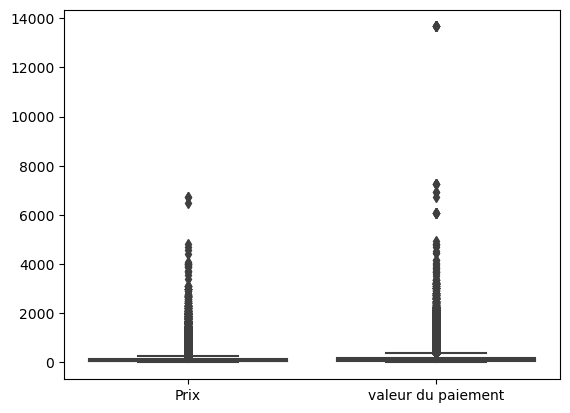

In [14]:
# Afficher dans un boxplot les deux colonnes
sn.boxplot(data_merge_sup[['Prix','valeur du paiement']])

c:\Users\SYLVAIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


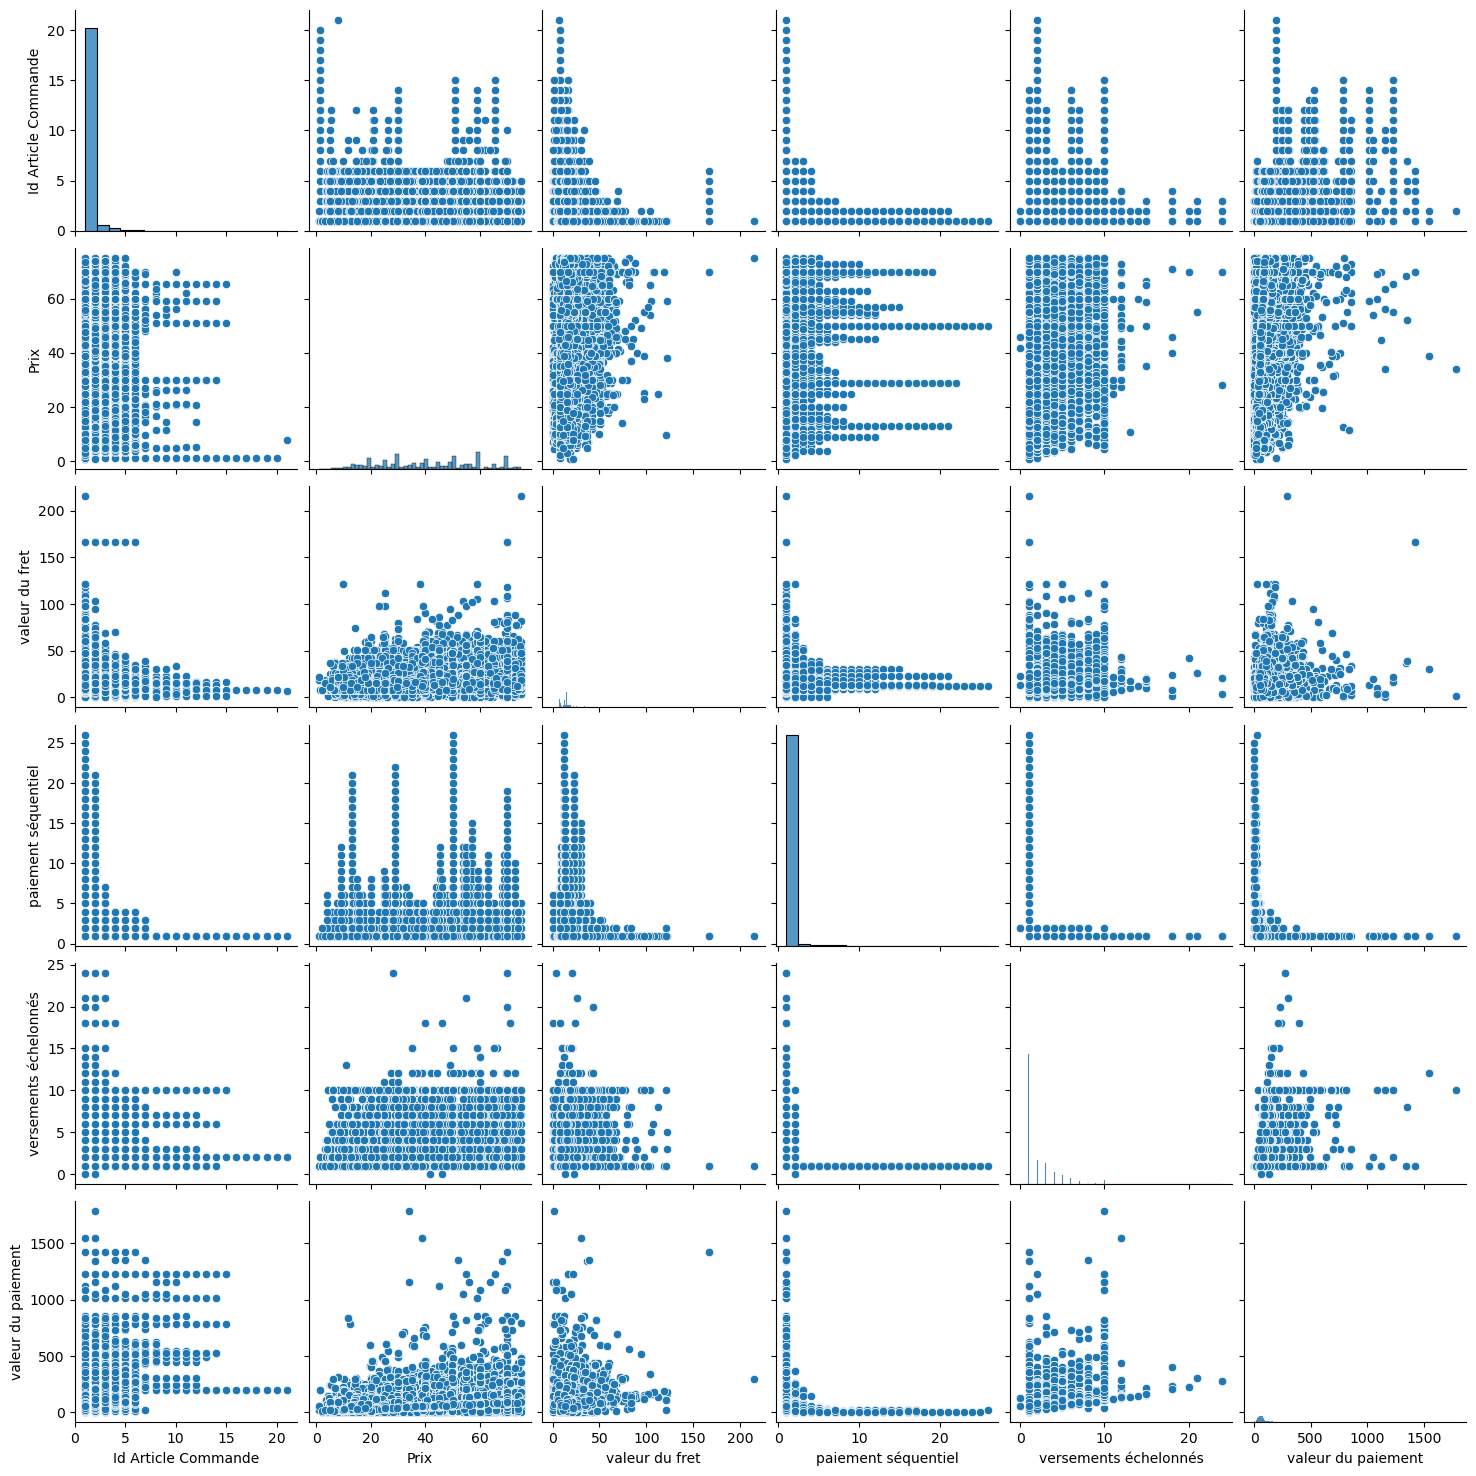

In [128]:
# Calculer le premier et le troisième quartile de la colonne 'Prix'
Q1 = data_merge_sup['Prix'].quantile(0.25)
Q3 = data_merge_sup['Prix'].quantile(0.75)

# Calculer l'écart interquartile (IQR)
IQR = Q3 - Q1

# Déterminer les limites inférieure et supérieure pour les valeurs non-aberrantes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les valeurs aberrantes
data_filtre = data_merge_sup[(data_merge_sup['Prix'] >= lower_bound) & (data_merge_sup['Prix'] <= upper_bound)]

# Créer un pairplot avec les données filtrées
sn.pairplot(data_filtre)


<Axes: >

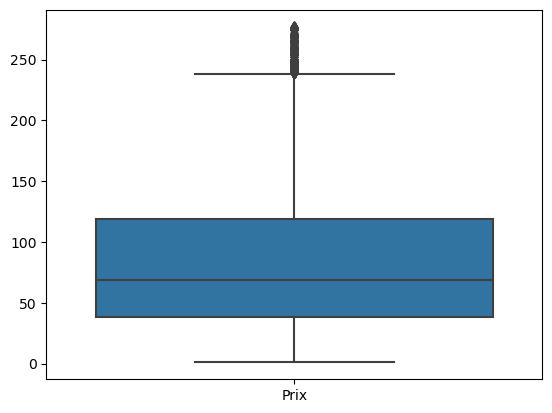

In [91]:
sn.boxplot(data_filtre[['Prix']])

## CREER DES FONCTIONS

In [92]:
def calcul_indices_de_disper(data_merge_sup,target):
    indx_disp_positive = 1.5 * (data_merge_sup[target].quantile(q=0.75 - 0.25))
    indx_disp_negative = -1.5 * (data_merge_sup[target].quantile(q=0.75 - 0.25))
    return indx_disp_positive,indx_disp_negative


In [32]:
def sous_ensemble_data(data_merge_sup,target):
    indx_disp_positive,indx_disp_negative = calcul_indices_de_disper(data_merge_sup,target)
    data_sous_ensemble = data_merge_sup[~((data_merge_sup[target] > indx_disp_positive) | (data_merge_sup[target] < indx_disp_negative))] 
    return data_sous_ensemble

In [36]:
sous_ensemble = sous_ensemble_data(data_merge_sup, target='Prix')
sous_ensemble


,Id Commande,Id Article Commande,Id Produit,Id Vendeur,Prix,valeur du fret,paiement séquentiel,type paiement,versements échelonnés,valeur du paiement
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,1,credit_card,2,72.19
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,1,credit_card,2,25.78
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,21.90,12.69,1,boleto,1,34.59
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,19.90,11.85,1,credit_card,1,31.75
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,53.99,11.40,1,credit_card,1,65.39
...,...,...,...,...,...,...,...,...,...,...
117593,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,55.00,34.19,1,boleto,1,356.76
117594,fffb9224b6fc7c43ebb0904318b10b5f,4,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,55.00,34.19,1,boleto,1,356.76
117598,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,1,credit_card,3,116.85
117599,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72,1,credit_card,3,64.71


<Axes: >

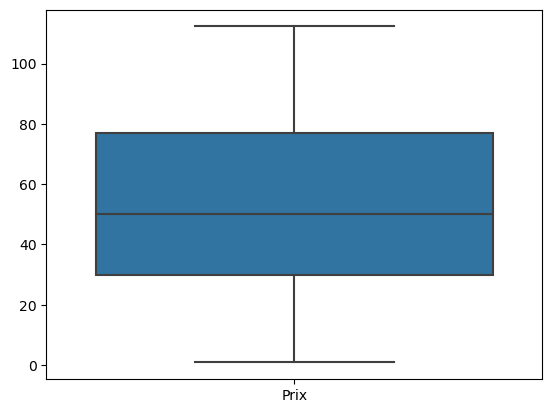

In [126]:
sn.boxplot(sous_ensemble[['Prix']])

<Axes: >

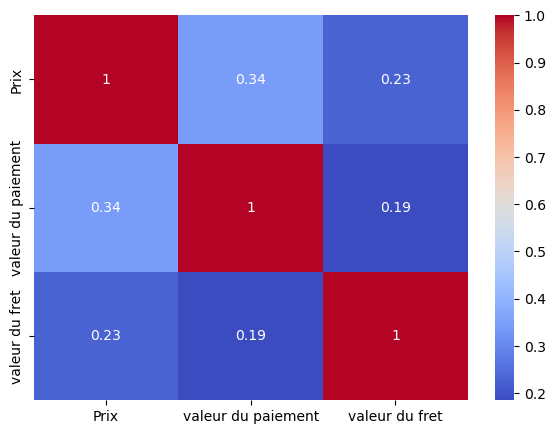

In [127]:
# Calcul de la Matrice de correlation
corr_martix = sous_ensemble[['Prix', 'valeur du paiement', 'valeur du fret']].corr()
plt.figure(figsize=(7,5))

#Afficher sous forme de Heatmap avec seaborn
sn.heatmap(corr_martix, annot=True, cmap='coolwarm')

In [57]:
def remplace_val_extrm_par_NaN(data_merge_sup,target):
    indx_disp_positive,indx_disp_negative = calcul_indices_de_disper(data_merge_sup,target)
    condition_etablie = (data_merge_sup[target] > indx_disp_positive) | (data_merge_sup[target] < indx_disp_negative)
    data_merge_sup.loc[condition_etablie, target] = np.nan

In [96]:
# Étape 1 : Nettoyage des données
remplace_val_extrm_par_NaN(data_merge_sup, target='Prix')


In [102]:
# Sélectionner les colonnes numériques pour l'imputation
numeric_columns = data_merge_sup.select_dtypes(include=['number']).columns

# Étape 2 : Imputation des valeurs manquantes uniquement sur les colonnes numériques
imputer = SimpleImputer(strategy='mean')
data_imputed_autre = data_merge_sup.copy()  # Copie des données originales
data_imputed_autre[numeric_columns] = imputer.fit_transform(data_imputed_autre[numeric_columns])


In [110]:
df = data_imputed_autre.drop(['Id Commande', 'Id Article Commande', 'Id Produit', 'Id Vendeur', 'paiement séquentiel', 'type paiement', 'versements échelonnés'], axis=1)
df.head()

,Prix,valeur du fret,valeur du paiement
0,58.900000,13.29,72.19
1,40.749808,19.93,259.83
2,40.749808,17.87,216.87
3,12.990000,12.79,25.78
4,40.749808,18.14,218.04


In [111]:
X = df[['valeur du paiement']]
y = df['Prix']

In [117]:
# Étape 3 : Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

In [122]:
# Étape 4 : Entraînement du modèle
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [123]:
predictions = model.predict(X_test)

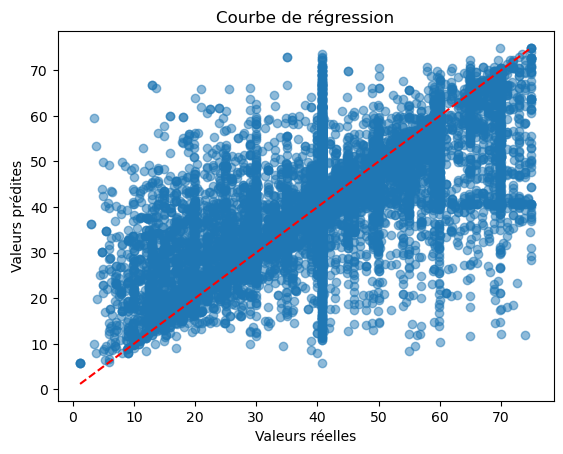

In [125]:
# Tracer la courbe des valeurs réelles par rapport aux valeurs prédites
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot(np.linspace(min(y_test), max(y_test), 100), np.linspace(min(y_test), max(y_test), 100), color='red', linestyle='--')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Courbe de régression')
plt.show()

In [42]:
indx_disp_positive = 1.5 * (data_merge_sup['Prix'].quantile(q=0.75 - 0.25))
indx_disp_negative = -1.5 * (data_merge_sup['Prix'].quantile(q=0.75 - 0.25))


In [43]:
# Filtrage des données
quantil_data_merge_sup = data_merge_sup[~((data_merge_sup['Prix'] > indx_disp_positive) | (data_merge_sup['Prix'] < indx_disp_negative))]


In [65]:
# Extarction des variables avec correlations > à 0.6
corr_treshold = 0.6
corr_var = corr_martix[abs(corr_martix['Prix']) > corr_treshold].index.tolist()
print(corr_var)

['Prix', 'valeur du paiement']
